In [ ]:
import pandas as pd

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving books_1.Best_Books_Ever.csv to books_1.Best_Books_Ever.csv


In [ ]:
books = pd.read_csv('books_1.Best_Books_Ever.csv')

In [ ]:
books.head()

,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,...,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9.78044E+12,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,...,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09
1,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9.78044E+12,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,...,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38
2,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,1E+13,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,...,05/23/06,07-11-1960,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",2269402,23328,NaN
3,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,1E+13,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,...,10-10-2000,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",1983116,20452,NaN
4,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9.78032E+12,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,...,09-06-2006,10-05-2005,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",1459448,14874,2.1


In [ ]:
print(books.shape)

print(books.columns)

print(books.isnull().sum())

(52478, 23)
Index(['title', 'series', 'author', 'rating', 'description', 'language',
       'isbn', 'genres', 'characters', 'bookFormat', 'edition', 'pages',
       'publisher', 'publishDate', 'firstPublishDate', 'awards', 'numRatings',
       'ratingsByStars', 'likedPercent', 'setting', 'bbeScore', 'bbeVotes',
       'price'],
      dtype='object')
title                   0
series              29008
author                  0
rating                  0
description          1338
language             3806
isbn                    0
genres                  0
characters              0
bookFormat           1473
edition             47523
pages                2347
publisher            3696
publishDate           880
firstPublishDate    21326
awards                  0
numRatings              0
ratingsByStars          0
likedPercent          622
setting                 0
bbeScore                0
bbeVotes                0
price               14365
dtype: int64


In [ ]:
books_clean = books[['title', 'author', 'description', 'genres', 'rating', 'numRatings']].copy()

In [ ]:
books_clean = books_clean.dropna(subset=['description'])
books_clean.shape

(51140, 6)

In [ ]:
books_clean.isnull().sum()

,0
title,0
author,0
description,0
genres,0
rating,0
numRatings,0


In [ ]:
import re

def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text)

    text = re.sub(r"<.*?>", " ", text)

    text = re.sub(r"\s+", " ", text)

    return text.strip()


In [ ]:
books_clean['title'] = books_clean['title'].apply(clean_text)
books_clean['description'] = books_clean['description'].apply(clean_text)
books_clean['genres'] = books_clean['genres'].astype(str).apply(clean_text)

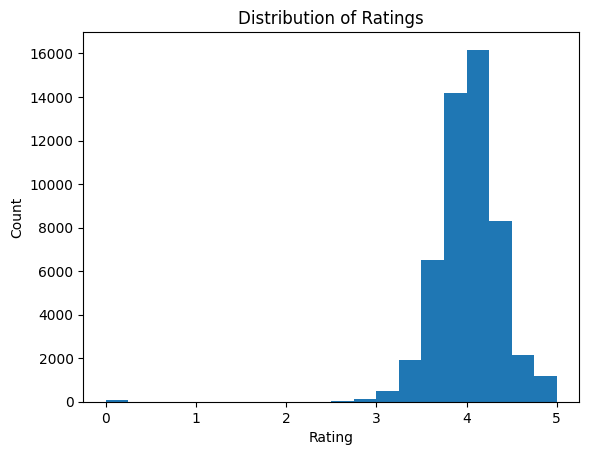

In [ ]:
import matplotlib.pyplot as plt

plt.hist(books_clean['rating'], bins=20)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

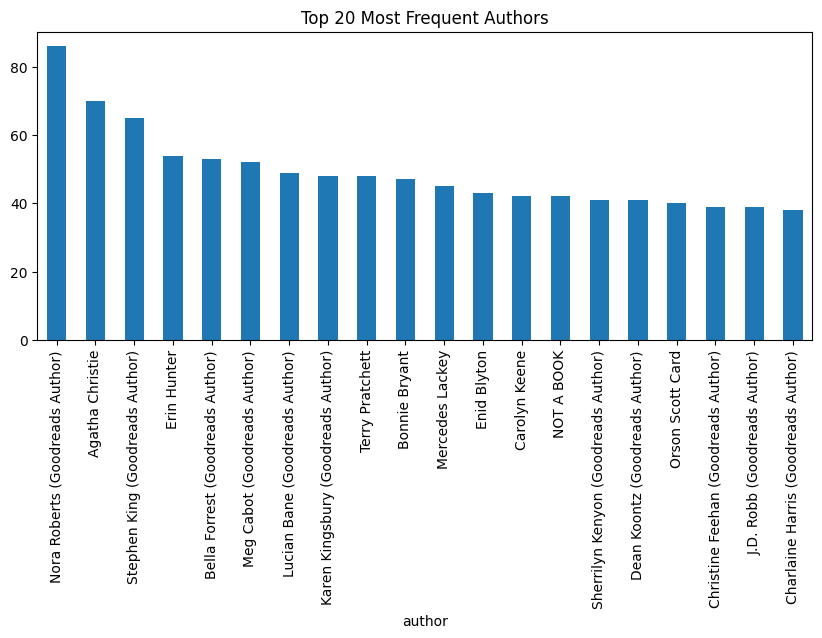

In [ ]:
books_clean['author'].value_counts().head(20).plot(kind='bar', figsize=(10,4))
plt.title("Top 20 Most Frequent Authors")
plt.show()

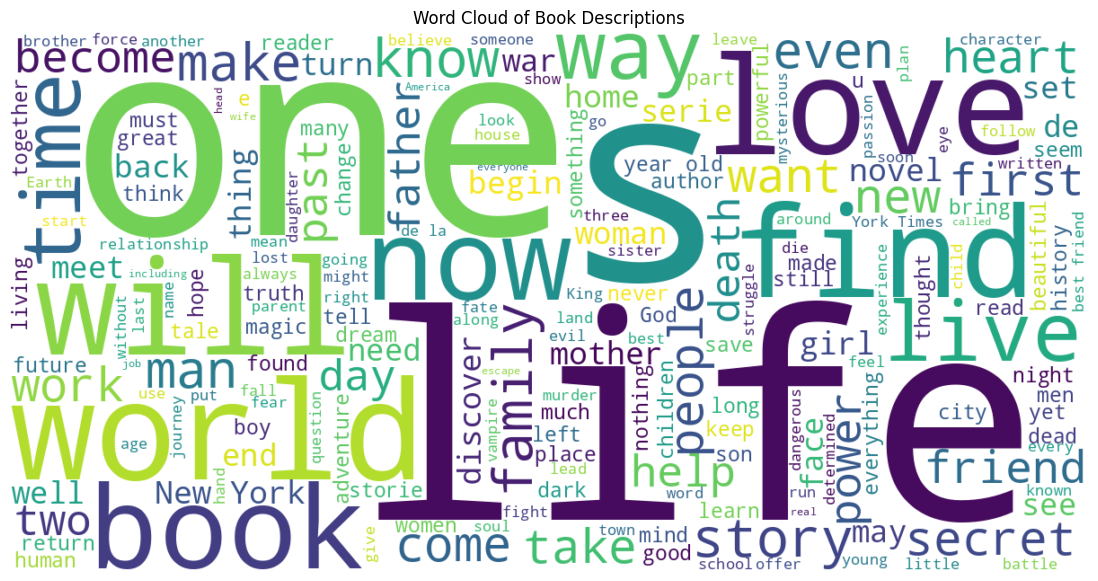

In [ ]:
from wordcloud import WordCloud

all_text = " ".join(books_clean['description'].tolist())

wc = WordCloud(width=1200, height=600, background_color="white").generate(all_text)

plt.figure(figsize=(15,7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Book Descriptions")
plt.show()

In [ ]:
import numpy as np

from sentence_transformers import SentenceTransformer

from sklearn.preprocessing import normalize

sample_books = books_clean.sample(1000, random_state=42)

model = SentenceTransformer('all-MiniLM-L6-v2')

descriptions = sample_books['description'].tolist()

sample_embeddings = model.encode(
    descriptions,
    show_progress_bar=True,
    convert_to_numpy=True
)

sample_embeddings = normalize(sample_embeddings, norm='l2')

sample_embeddings = np.array(sample_embeddings)

print("Embedding shape:", sample_embeddings.shape)
print("Sample books shape:", sample_books.shape)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Embedding shape: (1000, 384)
Sample books shape: (1000, 6)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend(query, model, books_df, embeddings, top_k=10):
    if not query or str(query).strip() == "":
        return books_df.head(0)

    query_emb = model.encode([query], convert_to_numpy=True)
    query_emb = query_emb / np.linalg.norm(query_emb, axis=1, keepdims=True)

    scores = cosine_similarity(query_emb, embeddings)[0]
    idx = scores.argsort()[::-1][:top_k]

    results = books_df.iloc[idx].copy()
    results["similarity"] = scores[idx]
    return results


In [ ]:
recommend("a dark psychological thriller", model, sample_books, sample_embeddings)

,title,author,description,genres,rating,numRatings,similarity
35193,Strange Love,JoLynne Valerie,Paranormal Romance.,[],4.88,8,0.649377
45678,Night Sins,Tami Hoag (Goodreads Author),A sensational New York Times bestseller and su...,"['Mystery', 'Suspense', 'Fiction', 'Thriller',...",3.96,10792,0.548818
30234,City of Light,Keri Arthur (Goodreads Author),The first in an all-new futuristic fantasy ser...,"['Urban Fantasy', 'Fantasy', 'Paranormal', 'Va...",3.89,2241,0.522042
9773,Teatro Grottesco,Thomas Ligotti,This collection features tormented individuals...,"['Horror', 'Short Stories', 'Fiction', 'Weird ...",4.10,3754,0.518507
7901,Archangel's Legion,Nalini Singh (Goodreads Author),"Nalini Singh, the New York Times bestselling “...","['Urban Fantasy', 'Paranormal', 'Angels', 'Rom...",4.41,22055,0.516171
17568,Ghost Road Blues,Jonathan Maberry (Goodreads Author),Winner of the Bram Stoker Award for Best First...,"['Horror', 'Fiction', 'Thriller', 'Zombies', '...",3.78,7245,0.515968
17671,The Choirboys,Joseph Wambaugh (Goodreads Author),"Partners in the Los Angeles Police Department,...","['Fiction', 'Crime', 'Mystery', 'Thriller', 'M...",4.05,4933,0.508606
8616,Tainted Pictures,Sarah Robinson (Goodreads Author),The second installment of the bestselling roma...,"['New Adult', 'Romance', 'Contemporary Romance...",4.25,298,0.505775
23492,Suddenly Psychic,Elizabeth Hunter (Goodreads Author),Every woman goes through changes in their fort...,"['Paranormal', 'Fantasy', 'Mystery', 'Urban Fa...",4.20,6267,0.505716
46355,UnBound,"Neal Shusterman (Goodreads Author), Michelle K...",In the New York Times bestselling Unwind Dysto...,"['Young Adult', 'Dystopia', 'Science Fiction',...",4.25,2854,0.498400


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

sent_model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(sent_model_name)
sent_model = AutoModelForSequenceClassification.from_pretrained(sent_model_name)


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def get_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    outputs = sent_model(**inputs)
    probs = outputs.logits.softmax(dim=1).detach().numpy()[0]
    classes = ["negative", "neutral", "positive"]
    return classes[np.argmax(probs)], np.max(probs)


In [ ]:
def combined_score(similarity, sent_conf, alpha=0.7):
    return alpha * similarity + (1 - alpha) * sent_conf

In [ ]:
def recommend_with_sentiment(query, desired_sentiment, model, books_df, embeddings, top_k=10, alpha=0.7, min_results=5):
    results = recommend(query, model, books_df, embeddings, top_k*2)  # get extra for fallback
    if results.empty:
        return results

    results["sentiment"], results["sent_conf"] = zip(*results["description"].apply(get_sentiment))
    results["combined_score"] = results.apply(
        lambda row: combined_score(row["similarity"], row["sent_conf"], alpha=alpha), axis=1
    )

    final = results[results["sentiment"] == desired_sentiment].sort_values("combined_score", ascending=False)

    if len(final) < min_results:
        needed = min_results - len(final)
        fallback = results[~results.index.isin(final.index)].sort_values("combined_score", ascending=False).head(needed)
        final = pd.concat([final, fallback])

    return final.head(top_k)


In [ ]:
query = "horror and mystery novel with vampires"
desired_sentiment = "positive"

recommended_books = recommend_with_sentiment(
    query,
    desired_sentiment,
    model,
    sample_books,
    sample_embeddings,
    top_k=10,
    alpha=0.7
)

recommended_books[["title", "author", "description", "similarity", "sentiment", "sent_conf", "combined_score"]]

,title,author,description,similarity,sentiment,sent_conf,combined_score
13066,Demon Thief,Darren Shan (Goodreads Author),The second novel in this bonechilling series b...,0.501513,positive,0.736792,0.572097
3584,Carmilla,J. Sheridan Le Fanu,"A classic Victorian vampire novella, which inf...",0.672869,neutral,0.785084,0.706533
40197,Marked by the Vampire,Cynthia Eden (Goodreads Author),New York Times and USA Today best-selling auth...,0.593763,neutral,0.793443,0.653667
29680,Origins,"Kresley Cole (Goodreads Author), Gena Showalte...",eBook box set of paranormal romance novels by ...,0.535123,neutral,0.894596,0.642965
35193,Strange Love,JoLynne Valerie,Paranormal Romance.,0.487656,neutral,0.885876,0.607122


In [ ]:
recommend_with_sentiment("fantasy adventure", "positive", model, sample_books, sample_embeddings)

,title,author,description,genres,rating,numRatings,similarity,sentiment,sent_conf,combined_score
45416,Helen and Troy's Epic Road Quest,A. Lee Martinez (Goodreads Author),Witness the epic battle of the cyclops!Visit t...,"['Fantasy', 'Humor', 'Fiction', 'Urban Fantasy...",4.02,2787,0.491256,positive,0.769171,0.574631
14720,Eragon's Guide to Alagaësia,Christopher Paolini (Goodreads Author),From the creators of the bestselling books Dra...,"['Fantasy', 'Dragons', 'Young Adult', 'Fiction...",4.05,3124,0.403227,positive,0.862336,0.540960
660,The Magus,John Fowles,"This daring literary thriller, rich with eroti...","['Fiction', 'Classics', 'Fantasy', 'Mystery', ...",4.05,47509,0.378539,positive,0.898630,0.534567
30080,Orkney,Amy Sackville (Goodreads Author),"Following her wonderful debut, The Still Point...","['Fiction', 'Scotland', 'Contemporary', 'Liter...",3.46,893,0.376330,positive,0.863868,0.522591
5659,The Summer Tree,Guy Gavriel Kay (Goodreads Author),The first volume in Guy Gavriel Kay’s stunning...,"['Fantasy', 'Fiction', 'Epic Fantasy', 'High F...",3.98,21374,0.477758,positive,0.592027,0.512039
23123,La maldición del brujo-leopardo,Heinz Delam,Rare book,[],2.95,76,0.393534,positive,0.536697,0.436483
24698,Fractured Fairy Tales of the Twilight Zone,J. Cafesin (Goodreads Author),Fractured Fairy tales meets The Twilight Zone ...,"['Fiction', 'Fantasy']",4.13,23,0.378247,positive,0.564267,0.434053
6363,On the Edge of the Dark Sea of Darkness,Andrew Peterson (Goodreads Author),"Once, in a cottage above the cliffs on the Dar...","['Fantasy', 'Fiction', 'Young Adult', 'Middle ...",4.30,9656,0.387108,positive,0.502210,0.421638


In [ ]:
books_clean.to_csv("books_clean.csv", index=False)
from google.colab import files
files.download("books_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sample_books.to_csv("sample_books.csv", index=False)
from google.colab import files
files.download("sample_books.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
np.save("sample_embeddings.npy", sample_embeddings)
from google.colab import files
files.download("sample_embeddings.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>